In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2



from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image
#from sklearn import metrics plot_confusion_matrix,
from sklearn.metrics import confusion_matrix,precision_recall_curve,classification_report

In [2]:
# classes

classes_names=['brooklyn_bridge',
              'buckingham_fountain',
              'capitol',
              'empire_state_building',
              'freedom_tower',
              'merchandise_mart',
              'petronas_tower',
              'pisa_tower',
              'statue_of_liberty',
              'sydney_opera_house',
               'taj_mahal',
               'the_bean',
               'white_house',
               'willis_tower']


# image size
target_size=(64,64)

# batch size
train_batch_size=32
test_batch_size=6

# generator of training images with rescaling,zooming,flipping etc.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.8,
                                   zoom_range = 0.8,
                                  horizontal_flip = True,
                                  vertical_flip=True)

# generator of valid images with only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# generator of test images with only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# path
training_images_path='./train_images'

valid_images_path='./valid_images'

test_images_path='./test_images'

# training set definition
training_set = train_datagen.flow_from_directory(training_images_path,
                                                 target_size = target_size,
                                                 batch_size =train_batch_size,
                                                 )
# valid set definition
valid_set = train_datagen.flow_from_directory(valid_images_path,
                                             target_size = target_size,
                                             batch_size = test_batch_size,
                                            )

# test set definition
test_set = train_datagen.flow_from_directory(test_images_path,
                                             target_size = target_size,
                                             batch_size = test_batch_size,
                                            )

Found 556 images belonging to 14 classes.
Found 155 images belonging to 14 classes.
Found 281 images belonging to 14 classes.


In [3]:
# 556 labels for the training images (from 0 to 13 for the 14 classes we have)
#training_set.labels

In [6]:
# network definition

# number of classes 
num_classes=14

# input shape: target_size,target_size,3 where 3 is the number of channels corresponding to red, green and blue
input_shape=(target_size[0],target_size[1],3)

# number of filters in the first convolution
n_filters=32

classifier = Sequential()

classifier.add(Conv2D(n_filters, kernel_size=(3, 3),
                    input_shape = input_shape,
                    activation = 'relu',
                    kernel_regularizer='l2',
                    bias_regularizer='l2'))

classifier.add(BatchNormalization())

classifier.add(MaxPool2D(pool_size = (2, 2)))  # max pool to halve the image size



classifier.add(Conv2D(n_filters*2, (3, 3),
                      activation = 'relu',
                      kernel_regularizer='l2',
                      bias_regularizer='l2')) # convolution with double number of filters

classifier.add(BatchNormalization())

classifier.add(MaxPool2D(pool_size = (2, 2))) # max pool to halve the image size



classifier.add(Conv2D(n_filters*4, 
                      (3, 3), 
                      activation = 'relu',
                      kernel_regularizer='l2',
                      bias_regularizer='l2')) # convolution with 4 times number of filters

classifier.add(BatchNormalization())

classifier.add(MaxPool2D(pool_size = (2, 2)))



classifier.add(Conv2D(n_filters*8, 
                      (3, 3), 
                      activation = 'relu',
                      kernel_regularizer='l2',
                      bias_regularizer='l2')) # convolution with 4 times number of filters

classifier.add(BatchNormalization())

classifier.add(MaxPool2D(pool_size = (2, 2)))


classifier.add(Flatten())  # flatten layer to turn 2D images into an array


classifier.add(Dense(units = 256, activation = 'relu')) # fully connected layer with 128 neurons

classifier.add(Dense(units = 64, activation = 'relu')) # fully connected layer with 64 neurons

classifier.add(Dense(units = 32, activation = 'relu')) # fully connected layer with 32 neurons

classifier.add(Dense(units = num_classes, activation = 'softmax')) # final classes prediction using softmax activation

In [7]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
classifier.fit(training_set,epochs=60,validation_data = valid_set)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 26 steps
Epoch 1/60
18/18 [==============================] - 10s 538ms/step - loss: 5.7248 - accuracy: 0.1223 - val_loss: 5.6042 - val_accuracy: 0.0903
Epoch 2/60
18/18 [==============================] - 5s 278ms/step - loss: 5.2676 - accuracy: 0.2086 - val_loss: 5.4967 - val_accuracy: 0.0581
Epoch 3/60
18/18 [==============================] - 5s 258ms/step - loss: 4.9239 - accuracy: 0.2482 - val_loss: 5.3028 - val_accuracy: 0.0710
Epoch 4/60
18/18 [==============================] - 5s 255ms/step - loss: 4.6944 - accuracy: 0.2824 - val_loss: 5.0847 - val_accuracy: 0.0710
Epoch 5/60
18/18 [==============================] - 5s 264ms/step - loss: 4.3879 - accuracy: 0.2986 - val_loss: 4.9699 - val_accuracy: 0.0774
Epoch 6/60
18/18 [==============================] - 5s 279ms/step - loss: 4.0618 - accuracy: 0.3327 - val_loss: 4.8818 - val_accuracy: 0.0774
Epoch 7/60
18/18 [==============================] - 5s 

Epoch 57/60
18/18 [==============================] - 5s 258ms/step - loss: 1.4730 - accuracy: 0.7716 - val_loss: 2.7910 - val_accuracy: 0.4258
Epoch 58/60
18/18 [==============================] - 5s 259ms/step - loss: 1.5022 - accuracy: 0.7680 - val_loss: 3.4536 - val_accuracy: 0.3355
Epoch 59/60
18/18 [==============================] - 5s 259ms/step - loss: 1.5190 - accuracy: 0.7446 - val_loss: 3.5201 - val_accuracy: 0.3032
Epoch 60/60
18/18 [==============================] - 5s 260ms/step - loss: 1.5181 - accuracy: 0.7482 - val_loss: 3.3792 - val_accuracy: 0.3548


In [9]:
# test accuracy

classifier.evaluate(test_set)

  ...
    to  
  ['...']
47/47 [==============================] - 2s 39ms/step - loss: 3.3764 - accuracy: 0.3950


[3.3764206754400377, 0.3950178]

In [10]:
num_test_samples=278

Y_pred = classifier.predict_generator(test_set, num_test_samples // test_batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')

               
print(classification_report(test_set.classes, y_pred, target_names=classes_names))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[1 1 2 1 1 2 3 1 1 1 0 2 4 0]
 [1 0 1 0 0 1 4 3 1 2 0 2 5 0]
 [1 1 1 1 0 1 1 5 0 1 0 1 6 1]
 [0 1 4 1 0 2 2 3 1 1 0 0 3 2]
 [1 1 1 2 0 0 0 3 2 2 1 3 4 0]
 [1 3 1 0 0 0 1 4 0 3 0 1 5 1]
 [0 0 6 0 1 0 0 3 1 0 0 2 4 3]
 [1 4 6 0 0 0 0 4 1 1 0 1 1 1]
 [1 0 1 0 0 0 1 7 0 2 1 1 4 2]
 [0 0 3 0 0 1 1 3 2 3 0 1 4 2]
 [0 1 3 0 1 0 1 8 0 1 0 0 3 2]
 [0 0 4 0 2 1 1 5 1 4 0 0 2 0]
 [1 0 2 0 1 0 2 3 3 1 1 1 2 3]
 [1 0 3 1 1 2 1 4 1 0 0 0 6 1]]
Classification Report
                       precision    recall  f1-score   support

      brooklyn_bridge       0.11      0.05      0.07        20
  buckingham_fountain       0.00      0.00      0.00        20
              capitol       0.03      0.05      0.03        20
empire_state_building       0.17      0.05      0.08        20
        freedom_tower       0.00      0.00      0.00        20
     merchandise_mart       0.00      0.00      0.00        20
    

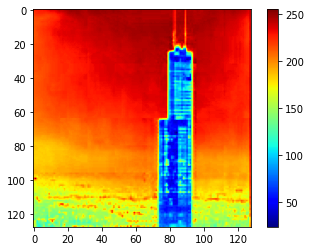

In [11]:
test_image=cv2.imread(training_images_path+'/willis_tower/0011.jpeg')

#cv2.imshow('test_image',test_image)

plt.imshow(test_image[:,:,0],cmap='jet')
plt.colorbar()

In [12]:
# load an image from test test

test_image = image.load_img(training_images_path+'/willis_tower/0009.jpeg', 
                            target_size = target_size)


test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

# predicted probability for all the classes
predicted_probability = classifier.predict(test_image)

In [13]:
# predicted class: class index with the highest probability
np.where(predicted_probability==np.max(predicted_probability))[1][0]

7

In [14]:
# predicted probability for all the classes
predicted_probability

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [15]:
# name of the classes with the index
training_set.class_indices

{'brooklyn_bridge': 0,
 'buckingham_fountain': 1,
 'capitol': 2,
 'empire_state_building': 3,
 'freedom_tower': 4,
 'merchandise_mart': 5,
 'petronas_tower': 6,
 'pisa_tower': 7,
 'statue_of_liberty': 8,
 'sydney_opera_house': 9,
 'taj_mahal': 10,
 'the_bean': 11,
 'white_house': 12,
 'willis_tower': 13}

In [16]:
# prediction for all the images in the test set

for i in range(len(test_set.filenames)):
    test_image = image.load_img(test_images_path+'/'+test_set.filenames[i], 
                            target_size = target_size)
    
    true_label = test_set.labels[i]
    
    test_image = image.img_to_array(test_image)

    test_image = np.expand_dims(test_image, axis = 0)

    predicted_probability = classifier.predict(test_image)
    
    predicted_label=np.where(predicted_probability==np.max(predicted_probability))[1][0]
    
    print('test image {}'.format(i))
    print('true label: {}'.format(true_label))
    print('predicted label: {}'.format(predicted_label))
    print('')
    


test image 0
true label: 0
predicted label: 7

test image 1
true label: 0
predicted label: 7

test image 2
true label: 0
predicted label: 7

test image 3
true label: 0
predicted label: 7

test image 4
true label: 0
predicted label: 7

test image 5
true label: 0
predicted label: 7

test image 6
true label: 0
predicted label: 7

test image 7
true label: 0
predicted label: 7

test image 8
true label: 0
predicted label: 7

test image 9
true label: 0
predicted label: 7

test image 10
true label: 0
predicted label: 7

test image 11
true label: 0
predicted label: 7

test image 12
true label: 0
predicted label: 7

test image 13
true label: 0
predicted label: 7

test image 14
true label: 0
predicted label: 7

test image 15
true label: 0
predicted label: 7

test image 16
true label: 0
predicted label: 7

test image 17
true label: 0
predicted label: 7

test image 18
true label: 0
predicted label: 7

test image 19
true label: 0
predicted label: 7

test image 20
true label: 1
predicted label: 7

te

test image 176
true label: 8
predicted label: 7

test image 177
true label: 8
predicted label: 7

test image 178
true label: 8
predicted label: 7

test image 179
true label: 8
predicted label: 7

test image 180
true label: 9
predicted label: 7

test image 181
true label: 9
predicted label: 7

test image 182
true label: 9
predicted label: 7

test image 183
true label: 9
predicted label: 6

test image 184
true label: 9
predicted label: 7

test image 185
true label: 9
predicted label: 7

test image 186
true label: 9
predicted label: 7

test image 187
true label: 9
predicted label: 7

test image 188
true label: 9
predicted label: 7

test image 189
true label: 9
predicted label: 7

test image 190
true label: 9
predicted label: 7

test image 191
true label: 9
predicted label: 7

test image 192
true label: 9
predicted label: 7

test image 193
true label: 9
predicted label: 7

test image 194
true label: 9
predicted label: 7

test image 195
true label: 9
predicted label: 7

test image 196
true 